In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob 

import sys
sys.path.append("/home/armstrong/Research/git_repos/seis-proc-dl")
from utils.model_helpers import compute_outer_fence_mean_standard_deviation

In [27]:
pref="seed1_128_0.0005_5e-3_0.0002_75_25_20/eval_checkpoint32_dropout0.3_FConly_N500"

Text(0, 0.5, 'Ensemble 0f N samples Residual OF STD')

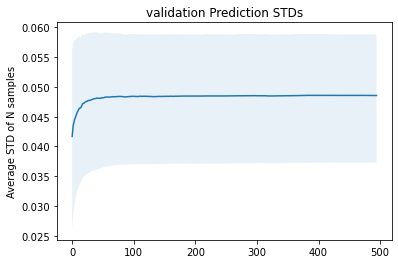

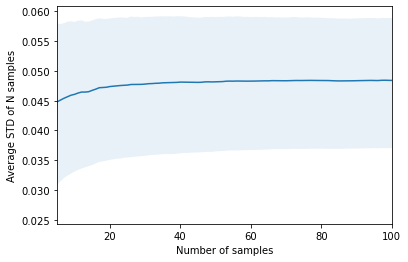

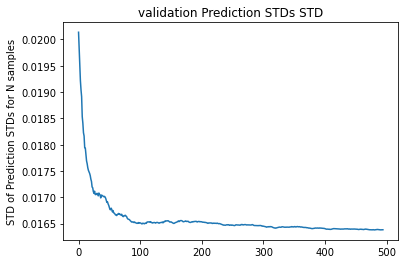

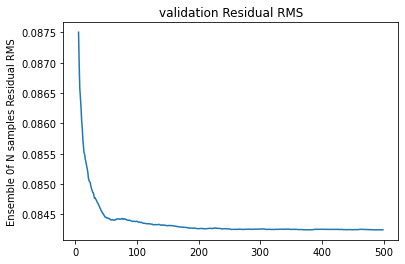

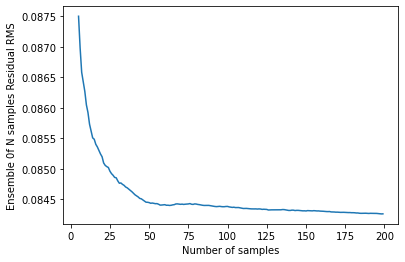

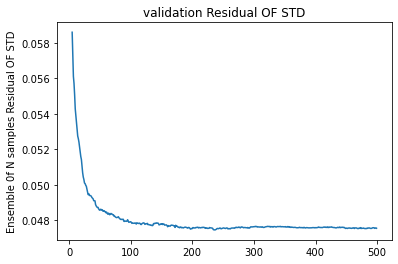

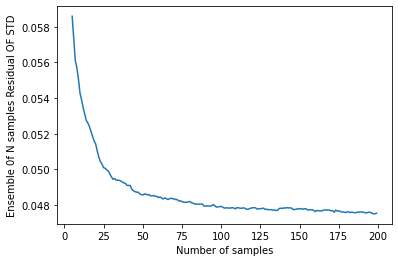

In [41]:
split_type = "validation"
# Load files
pdfile=f"{pref}/dropout_{split_type}_uncertainty_32_residual_summary_500.csv"
npzfile = f"{pref}/dropout_{split_type}_uncertainty_32.npz"

predictions = np.load(npzfile)["predictions"]
df = pd.read_csv(pdfile)

# Compute STD of N predictions - describe the prediction distribution
stds = np.zeros_like(predictions)
for i in range(500):
    stds[:, i] = np.std(predictions[:, :i+1], axis=1)

# Stats for those STDs
min_stds = np.min(stds, axis=0)
avg_stds = np.average(stds, axis=0)
max_stds = np.max(stds, axis=0)
std_lb, std_ub = np.quantile(stds, [0.16, 0.84], axis=0)
std_stds = np.std(stds, axis=0)

# Plot Residual performace for various values of N
plt.plot(avg_stds[5:])
plt.fill_between(np.arange(495), std_lb[5:], std_ub[5:], alpha=0.1)
plt.ylabel("Average STD of N samples")
plt.title(f"{split_type} Prediction STDs")

plt.figure()
plt.plot(avg_stds[5:])
plt.fill_between(np.arange(495), std_lb[5:], std_ub[5:], alpha=0.1)
plt.xlim([5, 100])
plt.xlabel("Number of samples")
plt.ylabel("Average STD of N samples")

plt.figure()
plt.plot(std_stds[5:])
plt.ylabel("STD of Prediction STDs for N samples")
plt.title(f"{split_type} Prediction STDs STD")

plt.figure()
plt.plot(df.ens_rms[5:])
plt.ylabel("Ensemble 0f N samples Residual RMS")
plt.title(f"{split_type} Residual RMS")

plt.figure()
plt.plot(df.ens_rms[5:200])
plt.xlabel("Number of samples")
plt.ylabel("Ensemble 0f N samples Residual RMS")

plt.figure()
plt.plot(df.ens_of_std[5:])
plt.ylabel("Ensemble 0f N samples Residual OF STD")
plt.title(f"{split_type} Residual OF STD")

plt.figure()
plt.plot(df.ens_of_std[5:200])
plt.xlabel("Number of samples")
plt.ylabel("Ensemble 0f N samples Residual OF STD")

Text(0, 0.5, 'Ensemble 0f N samples Residual OF STD')

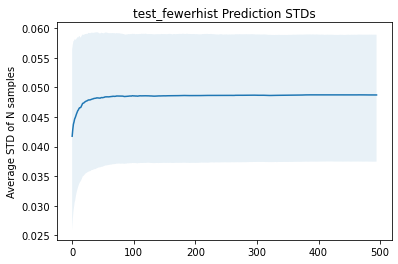

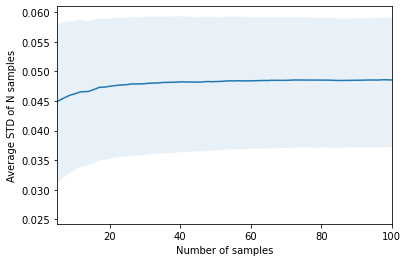

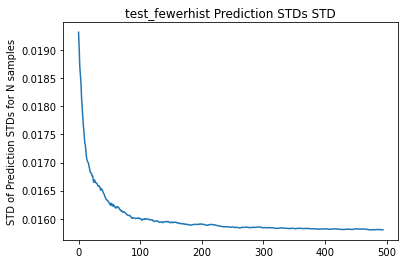

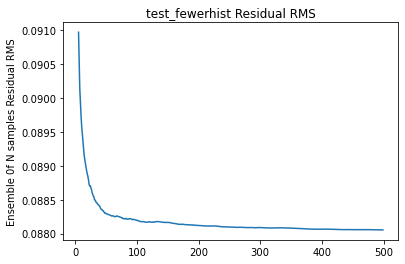

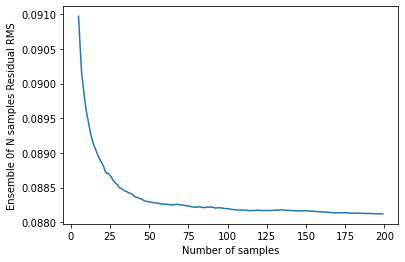

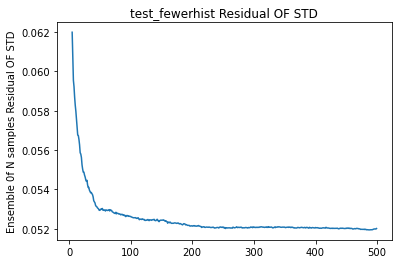

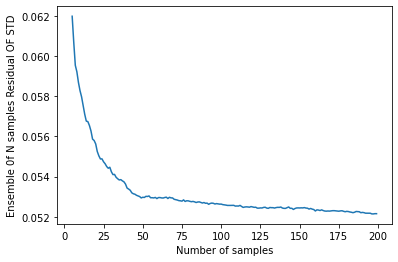

In [43]:
split_type = "test_fewerhist"
# Load files
pdfile=f"{pref}/dropout_{split_type}_uncertainty_32_residual_summary_500.csv"
npzfile = f"{pref}/dropout_{split_type}_uncertainty_32.npz"

predictions = np.load(npzfile)["predictions"]
df = pd.read_csv(pdfile)

# Compute STD of N predictions - describe the prediction distribution
stds = np.zeros_like(predictions)
for i in range(500):
    stds[:, i] = np.std(predictions[:, :i+1], axis=1)

# Stats for those STDs
min_stds = np.min(stds, axis=0)
avg_stds = np.average(stds, axis=0)
max_stds = np.max(stds, axis=0)
std_lb, std_ub = np.quantile(stds, [0.16, 0.84], axis=0)
std_stds = np.std(stds, axis=0)

# Plot Residual performace for various values of N
plt.plot(avg_stds[5:])
plt.fill_between(np.arange(495), std_lb[5:], std_ub[5:], alpha=0.1)
plt.ylabel("Average STD of N samples")
plt.title(f"{split_type} Prediction STDs")

plt.figure()
plt.plot(avg_stds[5:])
plt.fill_between(np.arange(495), std_lb[5:], std_ub[5:], alpha=0.1)
plt.xlim([5, 100])
plt.xlabel("Number of samples")
plt.ylabel("Average STD of N samples")

plt.figure()
plt.plot(std_stds[5:])
plt.ylabel("STD of Prediction STDs for N samples")
plt.title(f"{split_type} Prediction STDs STD")

plt.figure()
plt.plot(df.ens_rms[5:])
plt.ylabel("Ensemble 0f N samples Residual RMS")
plt.title(f"{split_type} Residual RMS")

plt.figure()
plt.plot(df.ens_rms[5:200])
plt.xlabel("Number of samples")
plt.ylabel("Ensemble 0f N samples Residual RMS")

plt.figure()
plt.plot(df.ens_of_std[5:])
plt.ylabel("Ensemble 0f N samples Residual OF STD")
plt.title(f"{split_type} Residual OF STD")

plt.figure()
plt.plot(df.ens_of_std[5:200])
plt.xlabel("Number of samples")
plt.ylabel("Ensemble 0f N samples Residual OF STD")

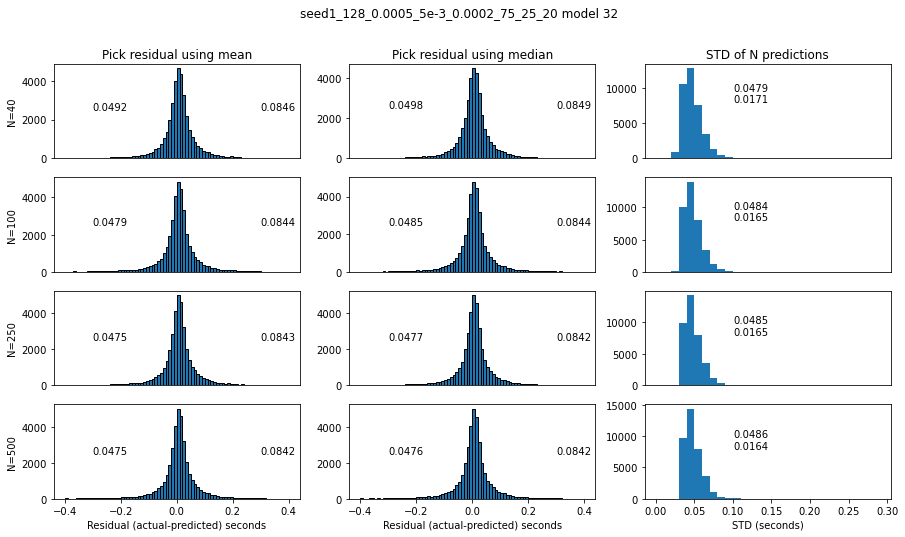

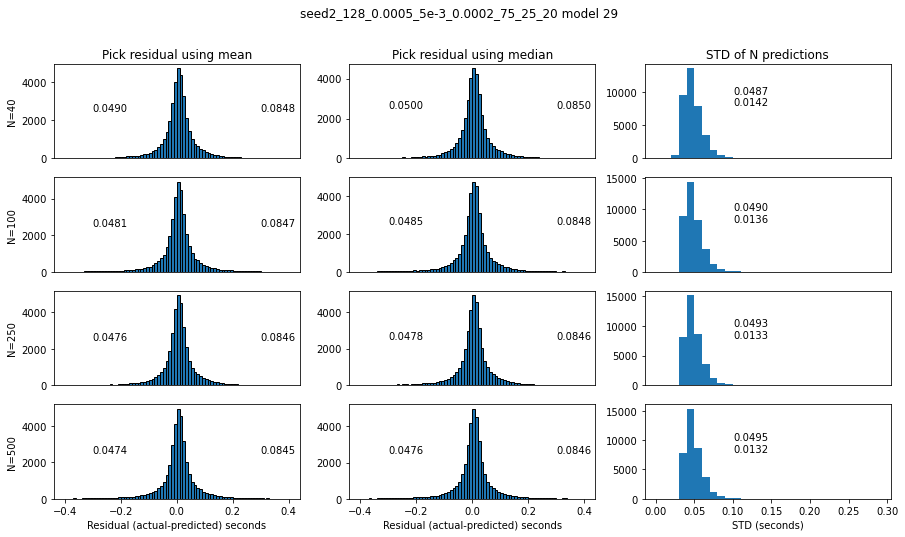

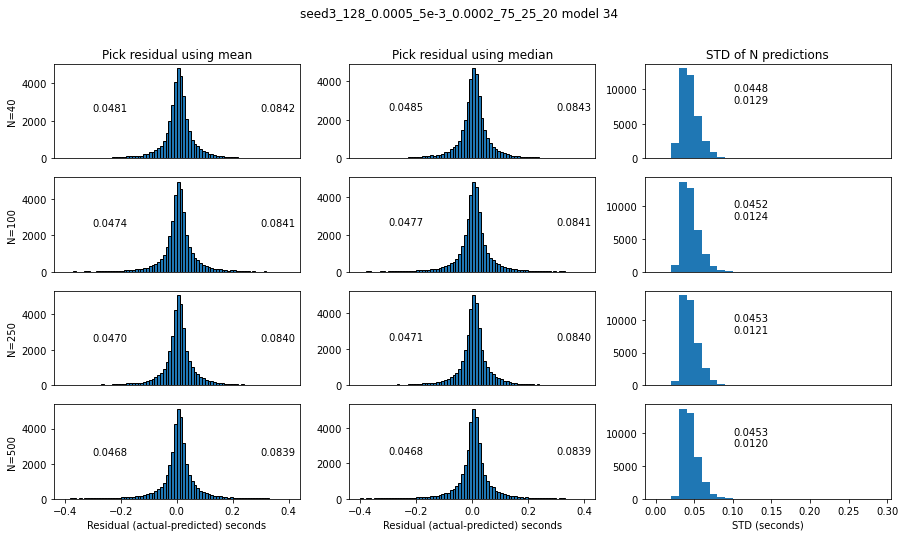

In [14]:
dropout_rates = [0.3]
checkpoints = [32, 29, 34]
N_rows = 4
for seed in [1, 2, 3]:
    pref = f"seed{seed}_128_0.0005_5e-3_0.0002_75_25_20"
    cp = checkpoints[seed-1]
    fig, axes = plt.subplots(N_rows, 3, figsize=(15, N_rows*2))
    fig.suptitle(f"{pref} model {cp}")
    i = 0    
    for drate in dropout_rates:
        for N in [40, 100, 250, 500]:
            npz_file = np.load(glob.glob(f"{pref}/eval_checkpoint{cp}_dropout{drate}_FConly_N500/dropout_validation_uncertainty_*.npz")[0])
            pid = f"N={N}"

            preds = npz_file["predictions"][:, 0:N]
            #print(preds.shape)
            targets = npz_file["targets"]
            pred_median = np.expand_dims(np.median(preds, axis=1), axis=1)
            pred_mean = np.expand_dims(np.mean(preds, axis=1), axis=1)
            pred_std = np.std(preds, axis=1)
            #print(pred_std.shape)
            #pred_std = npz_file["prediction_std"]
            mean_resids = targets - pred_mean
            median_resids = targets - pred_median

            axes[i][0].hist(mean_resids, bins=np.arange(-0.4, 0.41, 0.01), edgecolor="k");
            ofmean, ofstd = compute_outer_fence_mean_standard_deviation(mean_resids)
            rms = np.sqrt(np.sum(mean_resids**2)/len(mean_resids))
            axes[i][0].text(0.3, 2500, f"{rms:0.4f}")
            axes[i][0].text(-0.3, 2500, f"{ofstd:0.4f}")

            axes[i][1].hist(median_resids, bins=np.arange(-0.4, 0.41, 0.01), edgecolor="k");
            ofmean, ofstd = compute_outer_fence_mean_standard_deviation(median_resids)
            rms = np.sqrt(np.sum(median_resids**2)/len(median_resids))
            axes[i][1].text(0.3, 2500, f"{rms:0.4f}")
            axes[i][1].text(-0.3, 2500, f"{ofstd:0.4f}")

            axes[i][2].hist(pred_std, np.arange(0, 0.30, 0.01));
            axes[i][2].text(0.10, 8000, f"{np.mean(pred_std):0.4f}\n{np.std(pred_std):0.4f}")

            if i < N_rows-1:
                axes[i][0].set_xticks([])
                axes[i][1].set_xticks([])
                axes[i][2].set_xticks([])

            axes[i][0].set_ylabel(pid)

            i+=1


    axes[0][0].set_title("Pick residual using mean");
    axes[-1][0].set_xlabel("Residual (actual-predicted) seconds");
    axes[0][1].set_title("Pick residual using median");
    axes[-1][1].set_xlabel("Residual (actual-predicted) seconds");
    axes[0][2].set_title("STD of N predictions");
    axes[-1][2].set_xlabel("STD (seconds)");

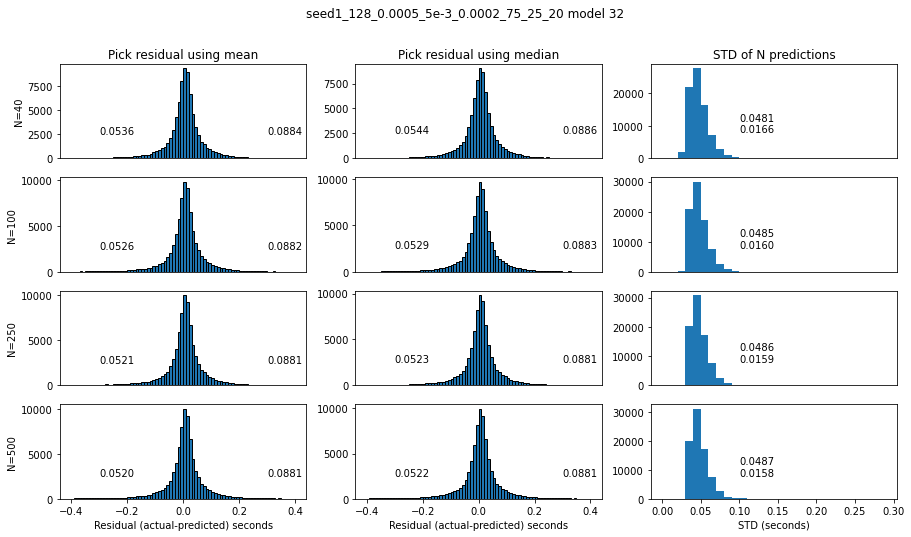

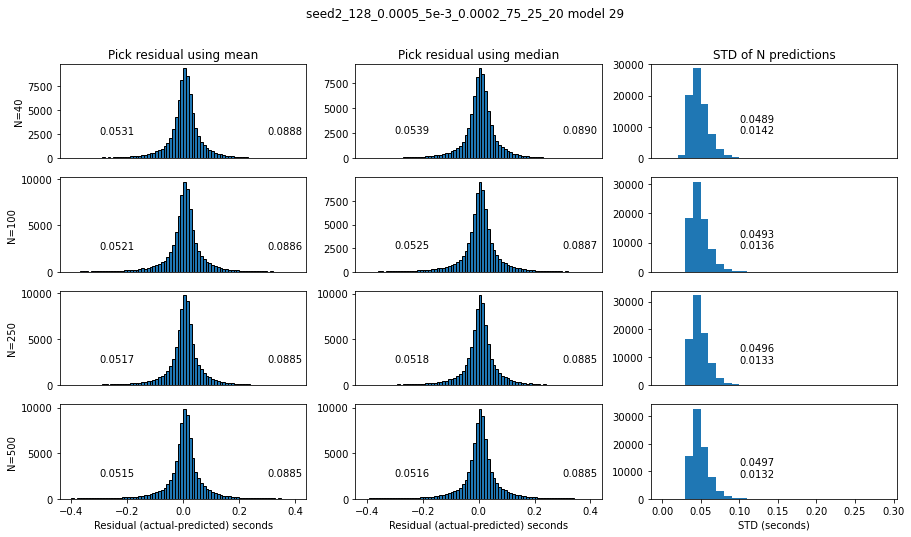

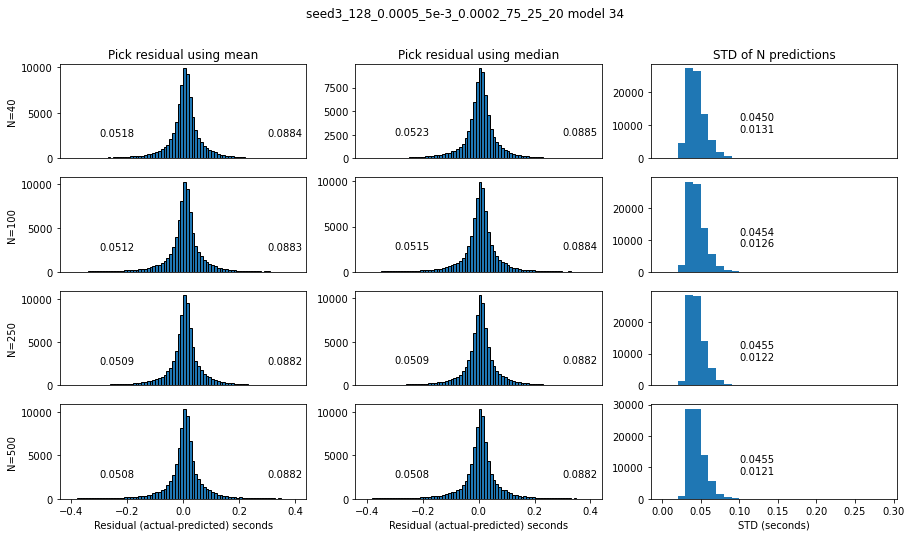

In [15]:
dropout_rates = [0.3]
checkpoints = [32, 29, 34]
N_rows = 4
for seed in [1, 2, 3]:
    pref = f"seed{seed}_128_0.0005_5e-3_0.0002_75_25_20"
    cp = checkpoints[seed-1]
    fig, axes = plt.subplots(N_rows, 3, figsize=(15, N_rows*2))
    fig.suptitle(f"{pref} model {cp}")
    i = 0    
    for drate in dropout_rates:
        for N in [40, 100, 250, 500]:
            npz_file = np.load(glob.glob(f"{pref}/eval_checkpoint{cp}_dropout{drate}_FConly_N500/dropout_test_fewerhist_uncertainty_*.npz")[0])
            pid = f"N={N}"

            preds = npz_file["predictions"][:, 0:N]
            #print(preds.shape)
            targets = npz_file["targets"]
            pred_median = np.expand_dims(np.median(preds, axis=1), axis=1)
            pred_mean = np.expand_dims(np.mean(preds, axis=1), axis=1)
            pred_std = np.std(preds, axis=1)
            #print(pred_std.shape)
            #pred_std = npz_file["prediction_std"]
            mean_resids = targets - pred_mean
            median_resids = targets - pred_median

            axes[i][0].hist(mean_resids, bins=np.arange(-0.4, 0.41, 0.01), edgecolor="k");
            ofmean, ofstd = compute_outer_fence_mean_standard_deviation(mean_resids)
            rms = np.sqrt(np.sum(mean_resids**2)/len(mean_resids))
            axes[i][0].text(0.3, 2500, f"{rms:0.4f}")
            axes[i][0].text(-0.3, 2500, f"{ofstd:0.4f}")

            axes[i][1].hist(median_resids, bins=np.arange(-0.4, 0.41, 0.01), edgecolor="k");
            ofmean, ofstd = compute_outer_fence_mean_standard_deviation(median_resids)
            rms = np.sqrt(np.sum(median_resids**2)/len(median_resids))
            axes[i][1].text(0.3, 2500, f"{rms:0.4f}")
            axes[i][1].text(-0.3, 2500, f"{ofstd:0.4f}")

            axes[i][2].hist(pred_std, np.arange(0, 0.30, 0.01));
            axes[i][2].text(0.10, 8000, f"{np.mean(pred_std):0.4f}\n{np.std(pred_std):0.4f}")

            if i < N_rows-1:
                axes[i][0].set_xticks([])
                axes[i][1].set_xticks([])
                axes[i][2].set_xticks([])

            axes[i][0].set_ylabel(pid)

            i+=1


    axes[0][0].set_title("Pick residual using mean");
    axes[-1][0].set_xlabel("Residual (actual-predicted) seconds");
    axes[0][1].set_title("Pick residual using median");
    axes[-1][1].set_xlabel("Residual (actual-predicted) seconds");
    axes[0][2].set_title("STD of N predictions");
    axes[-1][2].set_xlabel("STD (seconds)");

In [44]:
pref="seed1_128_0.0005_5e-3_0.0002_75_25_20/eval_checkpoint32_dropout0.3_FConly_N500"
pzfile = f"{pref}/dropout_test_validation_uncertainty_32.npz"
predictions = np.load(npzfile)["predictions"]

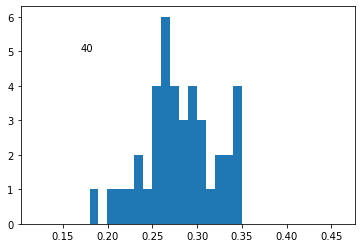

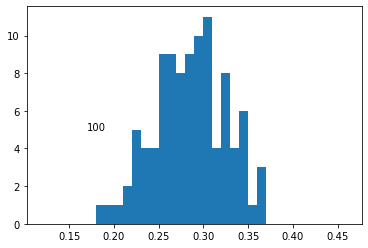

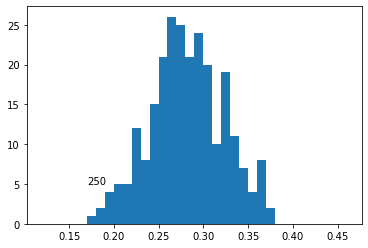

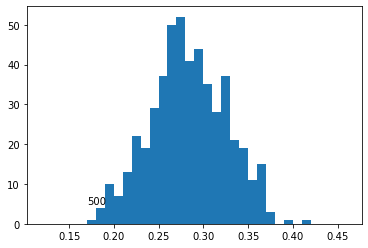

In [51]:
preds_i = predictions[0, :]
pred_min = np.min(preds_i) - 0.05
pred_max = np.max(preds_i) + 0.05
for N in [40, 100, 250, 500]:
    plt.figure()
    plt.hist(preds_i[:N], bins=np.arange(pred_min, pred_max, 0.01));
    plt.text(np.min(preds_i), 5, N)

# Maddox use 30 samples for all of their experiments, including dropout

# Go with 100 here? (Perhaps run both 100 and 40)

# Or just go with 40 since using an ensemble of 3 models (3x40=120)?